In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Spline example

In [3]:
from scipy import interpolate

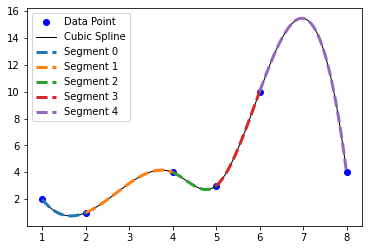

In [4]:
x = np.array([1, 2, 4, 5, 6, 8])  # sort data points by increasing x value
y = np.array([2,1,4,3,10,4])
arr = np.arange(np.amin(x), np.amax(x), 0.01)
s = interpolate.CubicSpline(x, y)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', label='Data Point')
ax.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)

for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    ax.plot(segment_x, segment_y, label='Segment {}'.format(i), ls='--', lw=3)

ax.legend()
plt.show()

In [5]:
M = 4 # Order-M spline, with highest degree M-1 

knots = [2,4,6,8]
lb = 0
ub = 10
knots_augmented = [lb]*M + knots + [ub]*M
c = [0 for i in range(len(knots_augmented))]

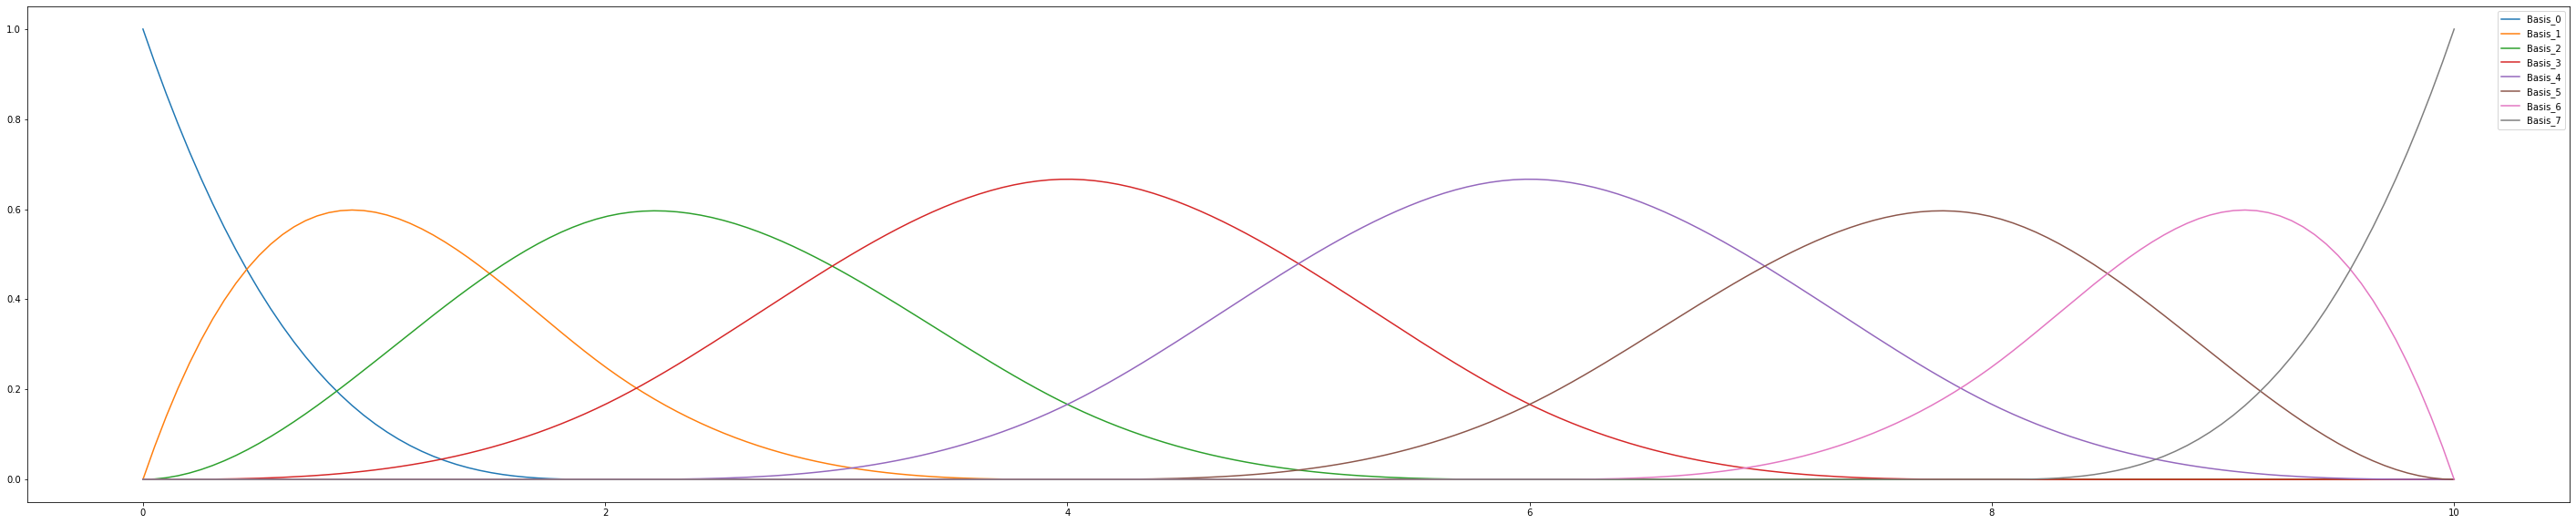

In [6]:
plt.figure(figsize=(50,10))
x = np.linspace(lb, ub, 200)
spl_basis = {}
for i in range(len(knots_augmented)-M):
    c[i] = 1
    spl_basis[i] = interpolate.BSpline(knots_augmented, c, 3)
    plt.plot(x, spl_basis[i](x), label='Basis_{}'.format(i))
    c[i] = 0
plt.legend(loc='best')

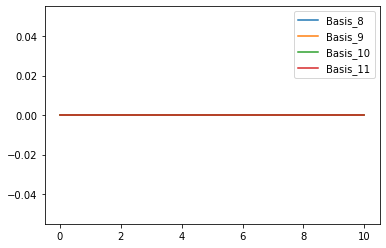

In [7]:
for i in range(len(knots_augmented)-M,len(knots_augmented)):
    c[i] = 1
    spl_basis[i] = interpolate.BSpline(knots_augmented, c, 3)
    plt.plot(x, spl_basis[i](x), label='Basis_{}'.format(i))
    c[i] = 0
plt.legend(loc='best')

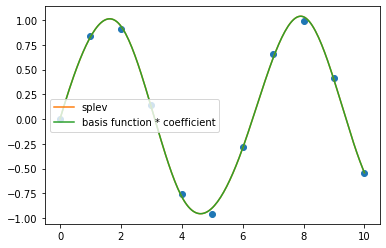

In [8]:
x_points = np.linspace(lb, ub, 11)
y_points = np.sin(x_points)

spl = interpolate.splrep(x_points, y_points, k=3, t=knots)
x_plot = np.linspace(0, 10, 200)
y2 = interpolate.splev(x_plot, spl)
y1 = np.dot(np.array([spl_basis[i](x_plot) for i in range(len(knots_augmented))]).T, spl[1])
plt.plot(x_points, y_points, 'o')
plt.plot(x_plot, y2, label = 'splev')
plt.plot(x_plot, y1, label = 'basis function * coefficient')
plt.legend(loc='best')

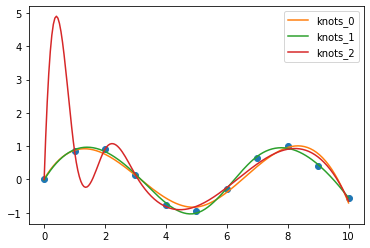

In [9]:
x_points = np.linspace(lb, ub, 11)
y_points = np.sin(x_points)
knots_options = [[5],[3,5,7],[1,2,3]]
x_plot = np.linspace(0, 10, 200)
plt.plot(x_points, y_points, 'o')

for i in range(len(knots_options)):
    spl = interpolate.splrep(x_points, y_points, k=3, t=knots_options[i])
    y = interpolate.splev(x_plot, spl)
    plt.plot(x_plot, y, label = 'knots_{}'.format(i))

plt.legend(loc='best')

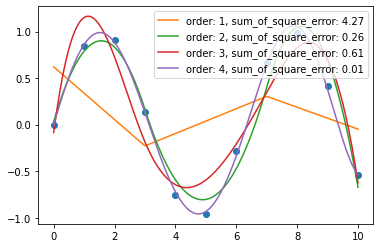

In [10]:
x_points = np.linspace(lb, ub, 11)
y_points = np.sin(x_points)
knots = [3,7]
x_plot = np.linspace(0, 10, 200)
plt.plot(x_points, y_points, 'o')

for i in range(1,5):
    spl = interpolate.splrep(x_points, y_points, k=i, t=knots, full_output=True)
    y = interpolate.splev(x_plot, spl[0])
    plt.plot(x_plot, y, label = 'order: {}, sum_of_square_error: {}'.format(i, round(spl[1],2)))

plt.legend(loc='best')

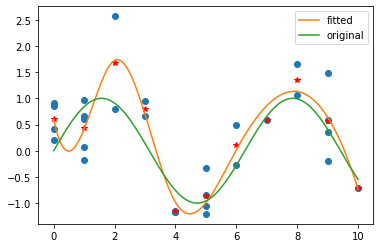

In [11]:
num_p = 30
x_points = np.floor(np.random.rand(num_p)*11)
err = np.random.normal(0, 0.5, size=num_p)
y_points = np.sin(x_points) + err

df = pd.DataFrame([x_points,y_points]).T
df_groupby = df.groupby(0).agg({1:'mean'}).reset_index()
x = np.array(df_groupby[0])
y = np.array(df_groupby[1])

knots = [2,4,6,8]
x_plot = np.linspace(0, 10, 200)
plt.plot(x_points, y_points, 'o')
plt.plot(x,y,'*',c='red')

spl = interpolate.splrep(x, y, k=3, t=knots, full_output=True)
y = interpolate.splev(x_plot, spl[0])
plt.plot(x_plot, y,label='fitted')
plt.plot(x_plot, np.sin(x_plot),label = 'original')
plt.legend()

# Generate training data

In [12]:
num_p = 100
x_train = np.sort(np.random.normal(5,3,num_p))
std_error = 0.5
err = np.random.normal(0, std_error**2, size=num_p)
y_train = np.sin(x_train) + err

(array([ 3.,  3., 12., 14., 21., 25.,  7.,  8.,  4.,  3.]),
 array([-2.87960448, -1.25790876,  0.36378697,  1.9854827 ,  3.60717843,
         5.22887416,  6.85056989,  8.47226562, 10.09396135, 11.71565708,
        13.33735281]),
 <a list of 10 Patch objects>)

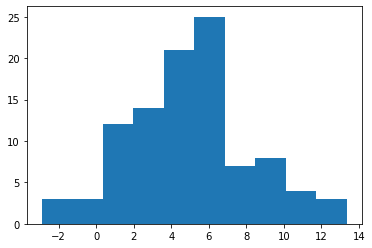

In [13]:
plt.hist(x_train)

## Bspline on training data

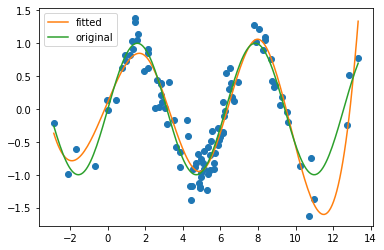

In [14]:
knots = [2,5,8]
plt.plot(x_train, y_train, 'o')
lb = min(x_train)
ub = max(x_train)
x_plot = np.linspace(lb, ub, 200)

spl = interpolate.splrep(x_train, y_train, k=3, t=knots, full_output=True)
y_predict = interpolate.splev(x_plot, spl[0])
plt.plot(x_plot, y_predict, label='fitted')
#plt.plot(x_plot, y - std_error*1.96, label = 'lb', ls='--')
#plt.plot(x_plot, y + std_error*1.96, label = 'ub', ls='--')
plt.plot(x_plot, np.sin(x_plot),label = 'original')
plt.legend()

## Non-parameteric bootstrap: model free

In [15]:
BS_num=200

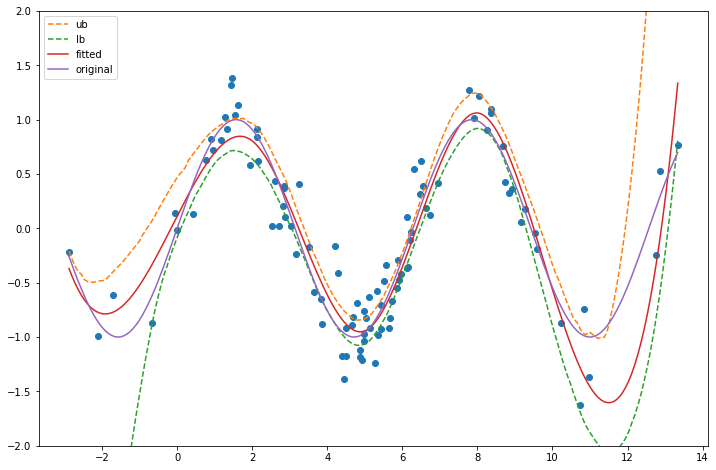

In [16]:
plt.figure(figsize=(12,8))
knots = [2,5,8]
x_plot = np.linspace(lb, ub, 200)
plt.plot(x_train, y_train, 'o')

res = np.ndarray(shape=(0,200))
index = np.random.choice(num_p, size=(BS_num,num_p))

for i in range(BS_num):
    uniqueid,weights = np.unique(np.sort(index[i]), return_counts=True) 
    x_new = x_train[uniqueid]
    y_new = y_train[uniqueid]
    spl = interpolate.splrep(x_new, y_new, w=weights, k=3, t=knots, full_output=True)
    y = interpolate.splev(x_plot, spl[0])
    res = np.append(res,np.array([y]),axis=0)
    
    #if i<3:
        #plt.plot(x_plot, y)
        #plt.plot(x_plot, np.sin(x_plot),label = 'original')
plt.plot(x_plot,np.quantile(res,0.95,axis=0),label='ub', ls='--')
plt.plot(x_plot,np.quantile(res,0.05,axis=0),label='lb', ls='--')

plt.plot(x_plot, y_predict, label='fitted')
plt.plot(x_plot, np.sin(x_plot),label = 'original')
#plt.xlim(left=0, right=10)
plt.ylim(top=2,bottom=-2)
plt.legend()

## Parametric bootstrap: resample y according to the model $Y = f(X) + \epsilon$

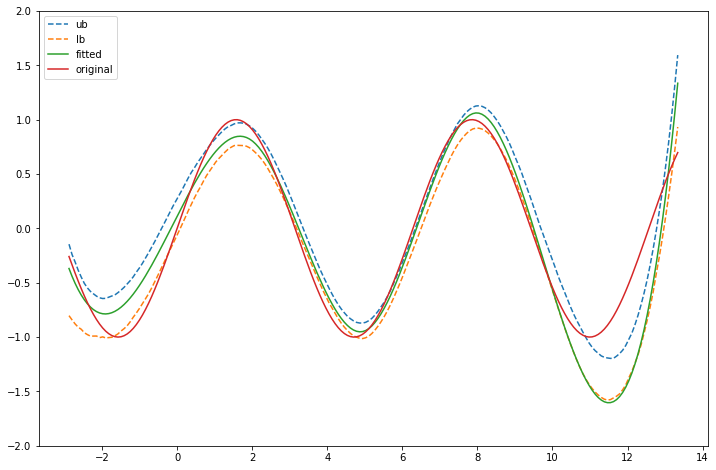

In [17]:
BS_num = 200
plt.figure(figsize=(12,8))
knots = [2,5,8]
x_plot = np.linspace(lb, ub, 200)

err = np.random.normal(0, std_error**2, size=(BS_num,num_p))
res = np.ndarray(shape=(0,200))

for i in range(BS_num):
    y_trainbs = np.sin(x_train) + err[i]
    
    spl = interpolate.splrep(x_train, y_trainbs, k=3, t=knots, full_output=True)
    y = interpolate.splev(x_plot, spl[0])
    res = np.append(res,np.array([y]),axis=0)

plt.plot(x_plot,np.quantile(res,0.95,axis=0),label='ub', ls='--')
plt.plot(x_plot,np.quantile(res,0.05,axis=0),label='lb', ls='--')

spl = interpolate.splrep(x_train, y_train, k=3, t=knots, full_output=True)
y = interpolate.splev(x_plot, spl[0])
plt.plot(x_plot, y_predict,label='fitted')
plt.plot(x_plot, np.sin(x_plot),label = 'original')
plt.ylim(top=2,bottom=-2)
plt.legend()

In [18]:
len(res)

200

In [19]:
x_train

array([-2.87960448e+00, -2.10318026e+00, -1.70349027e+00, -6.72681632e-01,
       -5.28276134e-02, -1.08617476e-02,  4.20669012e-01,  7.58979419e-01,
        9.13503847e-01,  9.59322647e-01,  1.15903236e+00,  1.28488770e+00,
        1.34062419e+00,  1.42380664e+00,  1.45397857e+00,  1.54577091e+00,
        1.61342568e+00,  1.94403371e+00,  2.12299441e+00,  2.12867056e+00,
        2.16465582e+00,  2.52815361e+00,  2.61077485e+00,  2.71616458e+00,
        2.82948053e+00,  2.84065825e+00,  2.85487451e+00,  2.87168112e+00,
        3.03169927e+00,  3.15545405e+00,  3.25967848e+00,  3.52616175e+00,
        3.63768538e+00,  3.83393550e+00,  3.85251791e+00,  4.21090923e+00,
        4.28324082e+00,  4.38092094e+00,  4.44385758e+00,  4.49057071e+00,
        4.51217606e+00,  4.65895272e+00,  4.68880427e+00,  4.79113964e+00,
        4.87630983e+00,  4.88563907e+00,  4.91745582e+00,  4.96702482e+00,
        4.98278528e+00,  4.98898835e+00,  5.04391638e+00,  5.11818207e+00,
        5.14654182e+00,  

In [28]:
x = np.linspace(0,1,101)
x = x[1:-1]

In [36]:
y_entropy = -x*np.log(x)-(1-x)*np.log(1-x)
y_gini = 2*x*(1-x)
y_misclassify = 1 - np.maximum(x,1-x)

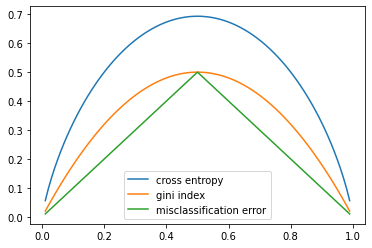

In [37]:
plt.plot(x,y_entropy,label='cross entropy')
plt.plot(x,y_gini,label='gini index')
plt.plot(x,y_misclassify,label='misclassification error')
plt.legend()

In [42]:
4.0/9

0.4444444444444444

In [40]:
x = 1.0/3

In [41]:
-x*np.log(x)-(1-x)*np.log(1-x)

0.6365141682948128

# Read Phoneme data

In [152]:
df = pd.read_csv('data/phoneme.data',index_col='row.names')

In [153]:
df = df.reset_index(drop=True)

In [154]:
df.g.value_counts()

iy     1163
ao     1022
sh      872
dcl     757
aa      695
Name: g, dtype: int64

In [155]:
df.head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
0,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,...,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh,train.dr1.mcpm0.sa1
1,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,...,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy,train.dr1.mcpm0.sa1
2,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,...,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl,train.dr1.mcpm0.sa1
3,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,...,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl,train.dr1.mcpm0.sa1
4,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,...,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa,train.dr1.mcpm0.sa1


In [156]:
df.speaker.value_counts()

train.dr5.mdwh0.sa1    12
train.dr5.mjrg0.sa1    12
train.dr8.mmpm0.sa1    12
train.dr5.mdhl0.sa1    12
train.dr5.mwac0.sa1    12
                       ..
train.dr6.mabc0.sa1     7
train.dr7.mrlj1.sa1     7
train.dr2.msat0.sa1     7
train.dr6.mtxs0.sa1     7
train.dr8.mbsb0.sa1     7
Name: speaker, Length: 437, dtype: int64

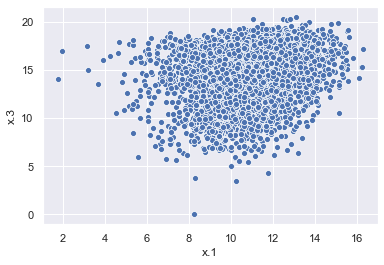

In [157]:
sns.scatterplot(x='x.1', y='x.3',data=df)

In [158]:
flist = []
for i in range(1,257):
    flist += ['x.{}'.format(i)]

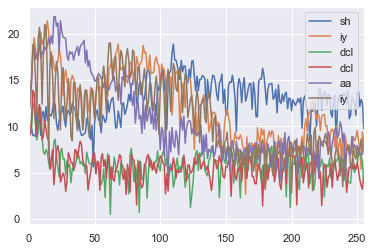

In [159]:
ax = df.T.reset_index()[[0,1,2,3,4,5]].loc[0:255].plot()
ax.legend(df.T.reset_index()[[0,1,2,3,4,5]].loc[256])

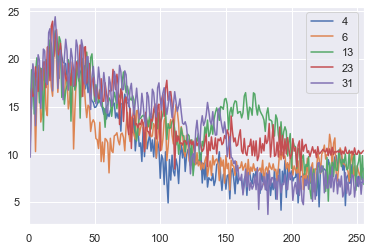

In [252]:
df[df['g']=='aa'].T.reset_index().loc[0:255][[4,6,13,23,31]].plot()

In [280]:
len(df[df['g']=='aa'])

695

In [311]:
y = np.array(df[df['g']=='aa'][flist]).flatten()
x = np.array([i for i in range(256)]*len(df[df['g']=='aa']))
df_temp = pd.DataFrame([x,y])
df_temp = df_temp.T.sort_values(0)
x = np.array(df_temp[0])
y = np.array(df_temp[1])

In [316]:
spl = splrep(x, y, k=3, t=[50,100,150,200])

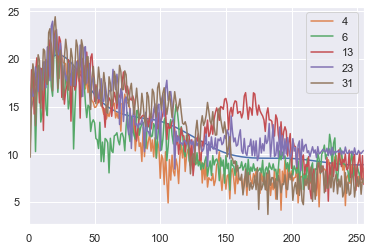

In [320]:
x2 = [i for i in range(256)]
y2 = splev(x2, spl)
fig, ax = plt.subplots()
plt.plot(x2, y2)
df[df['g']=='aa'].T.reset_index().loc[0:255][[4,6,13,23,31]].plot(ax=ax)

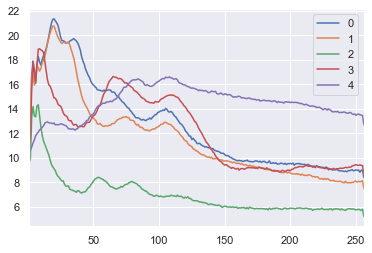

In [331]:
df.groupby('g').mean().reset_index().T.reset_index().loc[1:].plot()

In [321]:
df[df['g']=='aa'].T.reset_index().loc[0:255]

,index,4,6,13,23,31,33,41,51,54,...,4449,4458,4461,4469,4472,4480,4483,4491,4502,4505
0,x.1,12.9671,10.9532,11.6234,12.3439,11.7892,12.2864,12.6628,16.2642,10.9712,...,9.33213,10.5966,9.44372,11.6268,8.10673,14.3184,14.1257,11.6869,9.42752,12.0177
1,x.2,13.6945,11.2058,15.3549,15.4295,9.68653,10.0245,13.2082,16.3425,12.8137,...,12.0664,15.2105,15.3076,14.774,12.7503,13.7057,13.668,11.616,10.2524,11.8676
2,x.3,14.9118,16.1763,18.8545,16.9153,17.2344,17.0329,14.7312,17.1072,16.9017,...,16.7955,17.5836,17.1771,17.9832,17.5294,16.1487,17.7333,16.3626,16.9375,16.3471
3,x.4,18.2229,18.593,18.8517,16.0613,19.4872,18.1222,18.0936,18.8976,16.991,...,17.6495,16.6536,15.6948,17.3228,17.5845,19.3203,18.289,18.5413,18.6732,18.0521
4,x.5,18.4539,17.5092,14.2133,16.3125,18.4052,16.0588,18.4579,17.0157,14.0908,...,14.3619,16.1228,16.7277,14.8462,14.3384,18.9153,16.8505,16.9077,17.0776,15.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,x.252,7.69109,8.22345,9.18723,10.3947,6.60274,6.79202,6.09379,9.46921,12.1829,...,11.372,7.41232,7.02409,6.18482,7.85774,11.5581,11.5635,8.68826,10.1088,9.56486
252,x.253,6.93683,7.6361,10.2067,10.1192,7.65329,6.76001,6.60472,10.1011,10.8237,...,12.2564,8.54387,7.02246,4.63418,8.31139,13.6727,10.7712,4.31863,9.7611,10.8693
253,x.254,7.036,8.44448,7.32824,10.0701,5.80209,7.4147,7.73619,7.28103,12.2045,...,9.80073,7.81163,7.08441,5.95315,5.71972,14.5984,11.96,10.9938,9.19571,8.85308
254,x.255,7.01278,8.28905,9.85265,10.2679,7.43233,6.38915,5.23931,10.2422,12.4625,...,10.2562,7.13518,7.2373,7.29547,9.37266,13.6615,11.3889,10.8713,9.79198,9.88492


# Feature selection

In [185]:
X = np.array(df[flist])
y = np.array(df['g'])

In [220]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif
# define feature selection
#fs = SelectKBest(score_func=f_regression, k=10)
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(4509, 10)


In [221]:
fs.scores_.argsort()

array([  0,   1,   5, 255,   6,  52,  53,  50,  54,  51,  55,   4,  49,
        56,  48,   8,   7,  57,  58,   2,  47,   9,  59, 136, 138, 135,
       126, 129, 128, 121, 133, 134, 132, 122, 131, 130, 137, 176,  82,
       123, 249, 173, 127, 125, 253, 144, 254,  80, 177, 119, 117, 143,
       174, 252, 170, 124,  60, 169, 118, 251, 172, 120,  89, 243, 139,
       141,  46,  81, 247, 242, 250,  78, 175, 231,  79, 140, 178, 180,
       246, 166, 239, 171, 224, 168, 233,  84,  85, 116, 167,  77, 244,
       232, 182, 245, 236, 235, 145,  83, 115, 165, 234,  88, 238, 223,
       248,  87, 189,  86, 142,  76,  75,  92, 194,  45,  90, 207, 164,
       114, 181, 185, 148, 209, 163, 199, 156, 179, 228,  61,  91, 240,
       191,  93, 213, 184, 162, 211, 147, 192, 227, 146, 229, 113, 222,
       193,  10, 219, 206,  94, 186, 202, 190, 210, 241, 183,  73, 208,
       188, 205, 196, 220,  63, 215, 237, 221, 187, 201, 158, 198, 216,
        74, 204, 230, 200,  12, 195, 217, 157, 161, 150,  62, 14

In [222]:
X_selected[0]

array([11.82706, 12.81048,  9.5776 , 12.19465, 10.67933,  9.953  ,
       11.47047, 11.74805, 11.28167, 11.51648])

In [223]:
X[0][[18, 32,  19,  26,  22,  27,  28,  30,  31,  29]]

array([11.82706, 11.51648, 12.81048, 12.19465,  9.5776 , 10.67933,
        9.953  , 11.74805, 11.28167, 11.47047])

In [234]:
df_selected = pd.DataFrame(X_selected)
df_selected['y'] = y

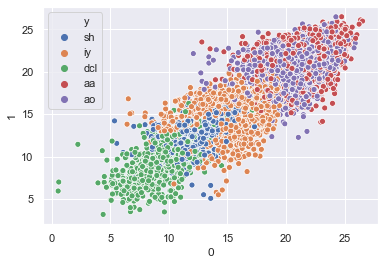

In [239]:
sns.scatterplot(x=0,y=1, hue='y', data=df_selected)

In [198]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [215]:
from sklearn.decomposition import PCA
num_pc = 10
pca = PCA(n_components=num_pc)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc_{}'.format(i) for i in range(1,num_pc+1)])
principalDf['y'] = y

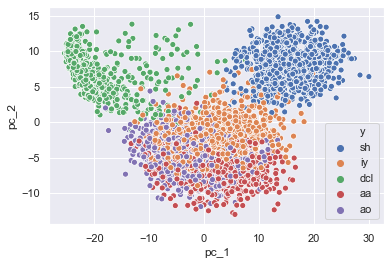

In [216]:
sns.scatterplot(x='pc_1',y='pc_2', hue='y', data=principalDf)

In [178]:
X[0][86]

0.748178254292441

In [172]:
X[0]

array([ 0.2820895 ,  0.50803115, -0.47901549, -1.59378558, -0.73836134,
        0.65346003, -0.68624555, -1.05322857, -1.2589783 ,  1.93773006,
        0.74823623,  0.85985017,  0.18613039,  0.32453263,  2.26189086,
       -0.57600883, -0.38028609, -0.52263824, -1.63027191,  0.11515953,
        1.77385052, -0.0144742 ,  0.2945465 , -0.71692221, -0.93646031,
       -1.31773741,  0.79546771, -1.38000446, -0.5070353 , -0.41235929,
        1.12203188,  0.80087959, -0.71846207, -1.04103151,  0.00344794,
        0.23908214, -0.20423775, -0.13346017, -0.81385845,  0.4148271 ,
        1.8983038 , -0.0358476 , -0.03886825, -0.82584608, -0.62248701,
       -0.74570715, -0.47393881, -1.7733367 , -0.98928155, -1.77185317,
        2.03712693,  0.24308908, -0.29310464,  0.60710413,  0.31699474,
       -1.23821907, -0.40520943, -0.60418158, -0.18096276,  0.70755315,
        1.11639941, -0.11492799, -0.64963204,  0.27869061,  1.2978706 ,
       -0.24850866,  0.82595665, -1.12735035, -0.36681771, -0.40

In [169]:
y

array([-129.21706254,  -16.59856317,   45.17308527, -289.8196051 ,
       -142.26940944,    4.0883275 ,  112.35585282,   46.33891089,
          4.05964911,  321.93998802,  416.11465108,  -76.50770102,
          3.66879604, -314.96120522,  186.80645881,   53.43209067,
        -12.08773195,  -44.19455593,  167.56848548,  101.75552188,
         71.75647174, -160.78583144,  -26.69845725, -329.22357078,
        -69.0592775 ,  -77.51218421, -214.30622316,  271.55117328,
        -68.21594014, -186.74637226,  -16.79252895,  -84.69752268,
         83.54463994,   42.81064862,  202.40807946,   61.46674786,
        -65.05188892,  168.97130948,   30.74838116,   56.82253075,
         17.07012544,  290.19969313, -171.66266364,   20.28341607,
       -172.64554855, -131.94574333,  108.13756143, -134.23446251,
        136.76056957,  123.68900448,  170.86194454, -147.37462723,
       -144.63610557,  185.42432469,  315.6762714 , -289.38975025,
       -223.08161286,  121.29054479,   27.33294002,  325.33267

In [168]:
fs.scores_

array([2.66101410e+00, 7.93439322e-02, 3.19976880e+00, 8.11922120e-01,
       3.26300621e-01, 4.41381722e-01, 2.17755766e-02, 2.11515053e-02,
       1.28267454e+00, 1.84095456e-01, 4.06124462e+00, 4.79387537e-02,
       1.38355198e+01, 4.07224312e-01, 1.37184861e+00, 1.64359267e+00,
       8.09610632e-01, 7.54179332e+00, 1.84730478e+00, 1.44281868e+00,
       8.72447309e-03, 2.03175268e+00, 5.25546839e-01, 1.83281030e-01,
       1.50908911e+00, 2.93033667e+00, 2.24667693e+01, 3.76455143e+00,
       3.16418754e-01, 4.73650541e+00, 2.50933780e-02, 1.82610277e+00,
       2.69922750e+01, 7.81663005e-01, 2.28342008e-01, 7.02457901e-02,
       1.62495194e-01, 1.25857373e+00, 2.61016813e+01, 6.73808041e-01,
       3.95596176e-02, 1.41578201e-01, 2.35742244e+00, 2.71604581e+00,
       6.65241579e-01, 3.02185656e-01, 3.71347562e+00, 1.04618481e+00,
       1.09006579e+00, 1.37576363e+00, 3.28207896e-01, 1.29216940e-01,
       1.63747110e+00, 4.97910273e-01, 4.20714398e+00, 5.53292471e+00,
      